# Importing Pokemon data from PokeAPI.co

In [1]:
import json
import requests
import numpy as np
import matplotlib.pyplot as plt

In [2]:
api_url_base = "https://pokeapi.co/api/v2/pokemon-species/"

There are 807 pokemons.

In [5]:
json_data_list = []
for i in range(152):
    response = requests.get(api_url_base + str(i))
    if response.status_code == 200:
        json_data = json.loads(response.content.decode('utf-8'))
        json_data_list.append(json_data)
    else:
        print(f"Could not retrieve pokemon nr: {i}")

all_pokemons = json.dumps(json_data_list)

Could not retrieve pokemon nr: 0


In [6]:
len(json_data_list)

151

In [7]:
with open('pokemons.json', 'w', encoding='utf-8') as f:
    json.dump(all_pokemons, f, ensure_ascii=False, indent=4)

# Looking at our data

In [8]:
genuses = []
for pokemon in json_data_list:
    genuses.append(pokemon["genera"][2]["genus"])

In [9]:
unique_gen, counts_gen = np.unique(genuses, return_counts=True)

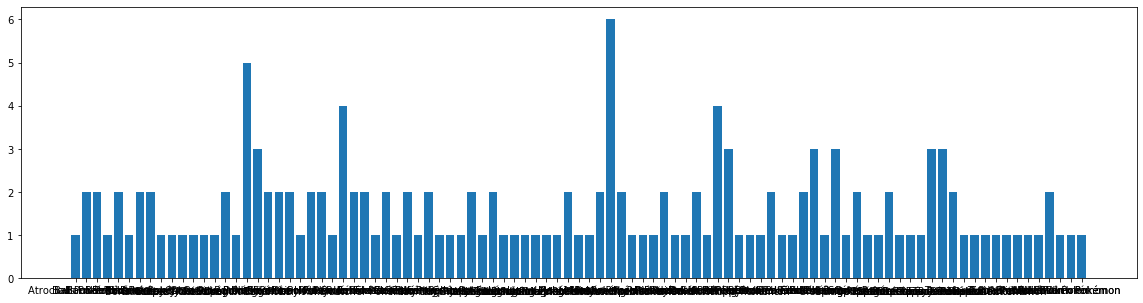

In [10]:
x = np.arange(len(unique_gen))
fig, ax = plt.subplots(figsize=(20,5))
plt.bar(x, counts_gen)
plt.xticks(x, unique_gen)
plt.show()

Seems like there are a lot of genuses. The relationships between the genuses I do not know.

In [11]:
len(unique_gen)

95

In [12]:
egg_groups = []
for pokemon in json_data_list:
    egg_groups.append(pokemon["egg_groups"][0]["name"])

In [13]:
unique_egg, counts_egg = np.unique(egg_groups, return_counts=True)
print(dict(zip(unique_egg, counts_egg)))

{'bug': 10, 'ditto': 1, 'dragon': 12, 'fairy': 7, 'flying': 10, 'ground': 32, 'humanshape': 14, 'indeterminate': 7, 'mineral': 9, 'monster': 5, 'no-eggs': 7, 'plant': 14, 'water1': 9, 'water2': 2, 'water3': 12}


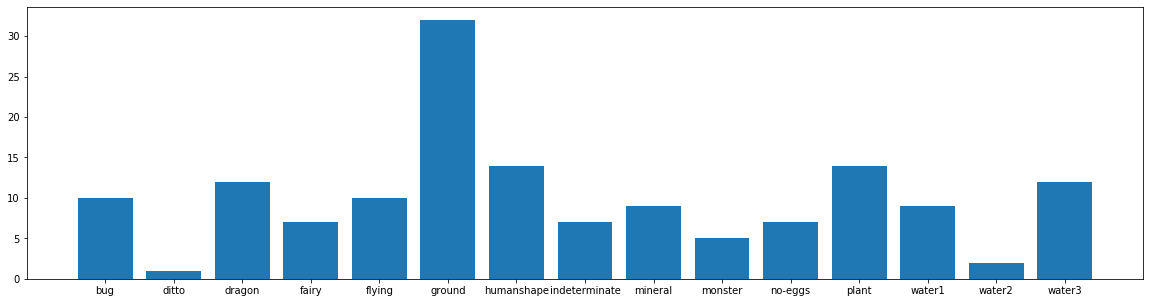

In [14]:
x = np.arange(len(unique_egg))
fig, ax = plt.subplots(figsize=(20,5))
plt.bar(x, counts_egg)
plt.xticks(x, unique_egg)
plt.show()

In [15]:
habitats = []
for pokemon in json_data_list:
    if pokemon["habitat"] != None:
        habitats.append(pokemon["habitat"]["name"])

In [16]:
unique_habitats, counts_habitats = np.unique(habitats, return_counts=True)
print(dict(zip(unique_habitats, counts_habitats)))

{'cave': 8, 'forest': 21, 'grassland': 35, 'mountain': 18, 'rare': 5, 'rough-terrain': 8, 'sea': 15, 'urban': 22, 'waters-edge': 19}


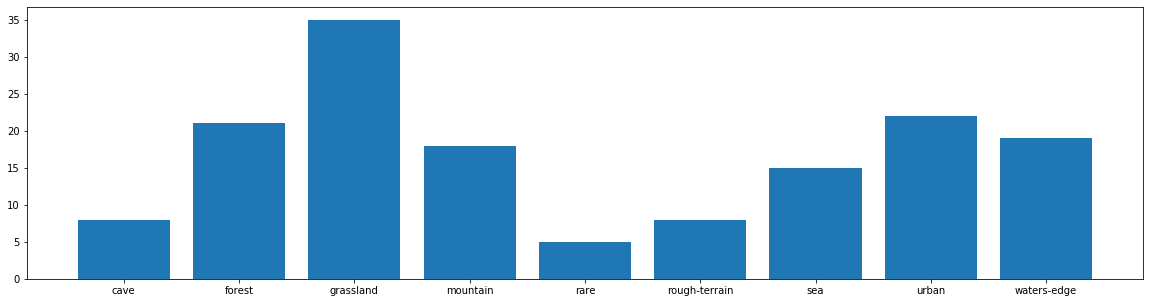

In [17]:
x = np.arange(len(unique_habitats))
fig, ax = plt.subplots(figsize=(20,5))
plt.bar(x, counts_habitats)
plt.xticks(x, unique_habitats)
plt.show()

# Results
<img src="img/Linnaeus.png" width="200">
If we choose Linnaeus' system of classification we place a pokemon in an hiarchy og biological classification as follows:
Kingdom - Animalia, Plantae, Fungi, Protista etc <br>
Phylum - Group of organisms with common traits <br>
Class - Level of complexity to the layout of the organ system. (fish, birds, mammals etc) <br>
Order - Grouping families with common ansestors based on their kinship. (primates etc) <br>
Family - Used for evolutionary studies to group genuses. <br>
Genus  - A group with direct offspring to eachother. (<i>to give birth to</i>) (Alaskian husky and Siberian Husky has same genus) <br>
Species - The basic unit of classification. One distinct type of living creature. <br>
<br>
Example: 
Man aka Homo Sapiens has the following classification:

| Classification | example|
| --------- | ---------- |
|Kingdom	|Animalia    |
|Phylum	    |Chordata    |
|Class	    |Mammalia    |
|Order	    |Primates    |
|Family	    |Hominidae   |
|Genus	    |Homo        |
|Species	|Homo sapiens|

Illustrated example:
<img src="img/dog_classification.png" width="80%">

After looking at available data we will have to be creative as we only have egg groups and genus. 

Our proposed solution is:

| Classification |              Pokemon                           |
| -------------- | ----------------------------------------       |
|Kingdom	     |Separate Egg Groups on Plants, Animals, Mineral |
|Phylum	         |Separate Bugs from Animals                      |
|Class	         |Separate Animals on Flying, Water, Dragon, Fairy|
|Order	         |-------------                                   |
|Family	         |-------------                                   |
|Genus	         |Pokemon Genus                                   |
|Species	     |Pokemon name                                    |

